In [30]:
import mahotas as mh
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

[샘플데이터 다운로드 사이트](https://github.com/luispedro/BuildingMachineLearningSystemsWithPython/tree/master/SimpleImageDataset)

In [31]:

from glob import glob
# glob() 함수는 인자로 받은 패턴과 이름이 일치하는 모든 파일과 디렉터리의 리스트를 반환 패턴을 그냥 *라고 주면 모든 파일과 디렉터리를 볼 수 있음

images = glob('../Image_similarity_practice/sample_data/*.jpeg')

features = []
labels = []
for im in images:
    labels.append(im[4:6])
    im = mh.imread(im)
    im = mh.colors.rgb2gray(im, dtype=np.uint8) # grayscale
    features.append(mh.features.haralick(im).ravel())
    # haralick : 그림에서 특징을 뽑아내는 알고리즘s

features = np.array(features)
labels = np.array(labels)

In [21]:
sc = StandardScaler()
features = sc.fit_transform(features)
from scipy.spatial import distance
dists = distance.squareform(distance.pdist(features))

In [22]:
features

array([[ 2.57285165, -0.85505556,  1.00130949,  2.48396746,  1.95903454,
         2.13099442,  2.47682109, -2.46042695, -2.07855425,  2.26875053,
        -1.82901871, -1.79808786,  0.76997432,  2.58058265, -0.80120767,
         0.93830163,  2.48611459,  2.17916935,  2.1306343 ,  2.47090741,
        -2.49237545, -2.16762421,  2.50424753, -1.97626983, -1.95261029,
         0.76724563,  2.58561028, -0.82055755,  0.93637823,  2.48437469,
         2.11511241,  2.12936627,  2.4740332 , -2.49127174, -2.14396628,
         2.47748348, -1.93514747, -1.93257974,  0.73065309,  2.58448496,
        -0.74855308,  0.89697381,  2.48611304,  2.16807894,  2.13062478,
         2.47237674, -2.49482247, -2.15774385,  2.50579423, -1.96456564,
        -1.93967849,  0.74757731],
       [-0.58351756,  2.41779001, -2.25221112, -0.50385739, -0.92013028,
        -1.01854877, -0.55314753,  0.61683607,  1.0821108 , -0.82330022,
         1.37327806,  1.234093  , -2.57685197, -0.57342838,  2.49734432,
        -2.35294

In [15]:
dists[0][0:29]

array([ 0.        ,  9.52392065,  6.80440971,  9.32496879, 11.26181039,
       10.61251762,  9.4119545 , 10.60287679,  1.7775029 ,  9.41345067,
       13.44980617,  3.00865982,  6.29040004,  8.65668427, 10.61260408,
       14.90123478, 16.93399771,  8.82887085, 13.01154502, 12.19970768,
        7.91744745,  3.3278804 , 10.00378324,  9.30151487,  6.92608457,
        5.89950609,  9.86709765, 14.41611228, 11.7347651 ])

In [23]:
def selectImage(n, m, dists, images):
    image_position = dists[n].argsort()[m]
    image = mh.imread(images[image_position])
    return image

def plotImages(n):
    plt.figure(figsize=(15,5))
    
    plt.subplot(141)
    plt.imshow(selectImage(n,0, dists, images))
    plt.title('Original')
    plt.xticks([])
    plt.yticks([])

    plt.subplot(142)
    plt.imshow(selectImage(n,1, dists, images))
    plt.title('1st simular one')
    plt.xticks([])
    plt.yticks([])

    plt.subplot(143)
    plt.imshow(selectImage(n,2, dists, images))
    plt.title('2nd simular one')
    plt.xticks([])
    plt.yticks([])

    plt.subplot(144)
    plt.imshow(selectImage(n,3, dists, images))
    plt.title('3rd simular one')
    plt.xticks([])
    plt.yticks([])

    plt.show()

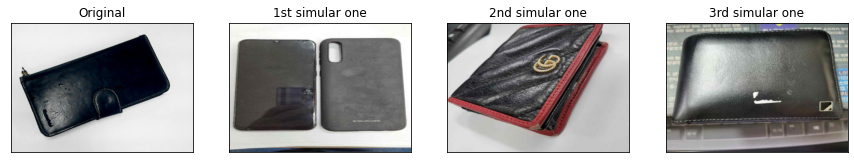

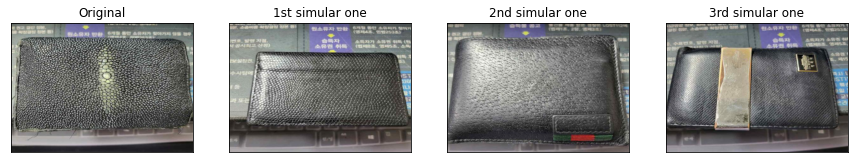

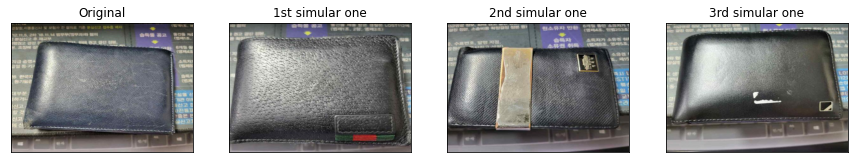

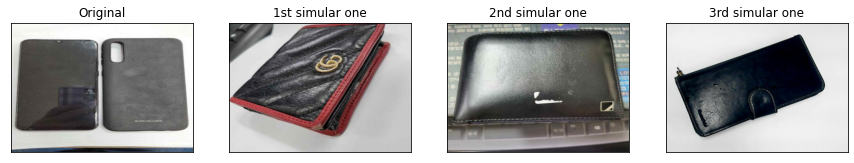

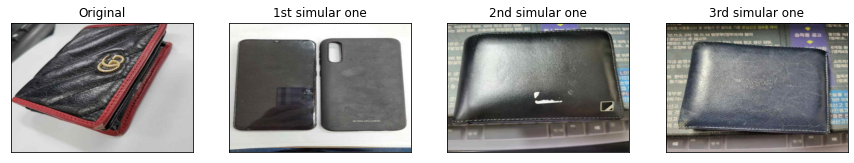

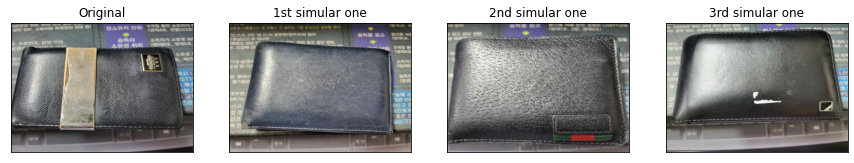

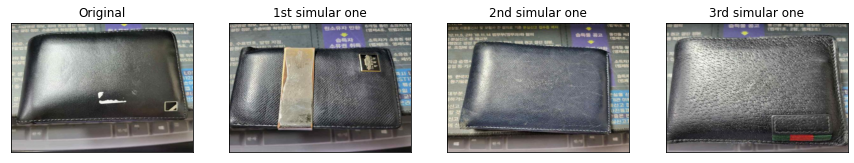

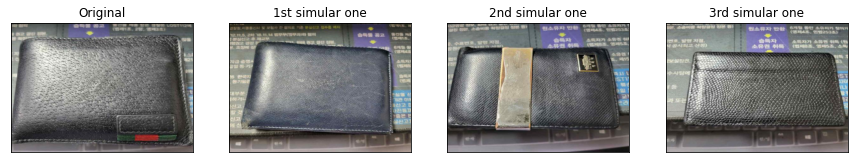

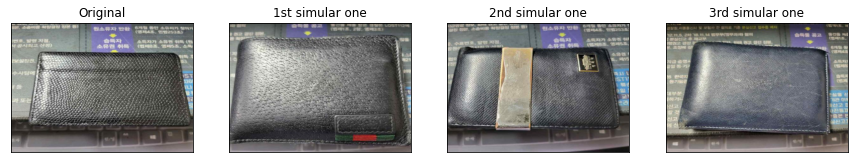

In [29]:
for i, img in enumerate(images):
    plotImages(i)